In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset?select=Books.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adnamard
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset


100%|██████████| 24.3M/24.3M [00:00<00:00, 28.9MB/s]


# **Read Dataset**

In [3]:
bookdf = pd.read_csv('book-recommendation-dataset/Books.csv')

<ipython-input-3-fee834cedb7f>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  bookdf = pd.read_csv('book-recommendation-dataset/Books.csv')


In [4]:
ratingdf = pd.read_csv('book-recommendation-dataset/Ratings.csv')

In [5]:
userdf = pd.read_csv('book-recommendation-dataset/Users.csv')

In [6]:
bookdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
ratingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [8]:
userdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


# **Data Preprocessing**
**We'll check is there any missing value, duplicated, overfitting etc**

# **A. Missing Value**

In [9]:
bookdf.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
ratingdf.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [11]:
userdf.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

# **B. Duplicated Data**

In [12]:
bookdf.duplicated().sum()

0

In [13]:
ratingdf.duplicated().sum()

0

In [14]:
userdf.duplicated().sum()

0

# **Innacurate Data Types**

In [15]:
bookdf.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [16]:
ratingdf.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [17]:
userdf.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

# **Action Preprocessing/Handling**
After we checked them, now we'll do some action to tackle each by each.

**A. Missing Value Handling**

In [18]:
# Cek row dimana ada missing value
rows_with_missing = bookdf[bookdf.isna().any(axis=1)]

# Cek col dimana ada missing value
cols_with_missing = bookdf.columns[bookdf.isna().any()].tolist()

# Print rows and columns with missing values
print("Rows with missing values:")
print(rows_with_missing)

print("\nColumns with missing values:")
print(cols_with_missing)


Rows with missing values:
              ISBN                                         Book-Title  \
118033  0751352497                           A+ Quiz Masters:01 Earth   
128890  193169656X                                        Tyrant Moon   
129037  1931696993                                    Finders Keepers   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

            Book-Author Year-Of-Publication  \
118033              NaN                1999   
128890  Elaine Corvidae                2002   
129037  Linnea Sinclair                2001   
187689              NaN                1995   
209538             2000   DK Publishing Inc   
220731             2003           Gallimard   
221678             2000   DK Publishing Inc   

            

1. Book-Author

In [19]:
#Book1
# Specify the row index and column name
row_index = 118033
col_name = 'Book-Author'

# Prompt the user to input the replacement author
replacement_author = input("Enter the replacement author: ")

# Replace the missing value with the replacement author
bookdf.at[row_index, col_name] = replacement_author

# Check if the value has been replaced
print(bookdf.loc[row_index])


Enter the replacement author: Unknown
ISBN                                                          0751352497
Book-Title                                      A+ Quiz Masters:01 Earth
Book-Author                                                      Unknown
Year-Of-Publication                                                 1999
Publisher                                             Dorling Kindersley
Image-URL-S            http://images.amazon.com/images/P/0751352497.0...
Image-URL-M            http://images.amazon.com/images/P/0751352497.0...
Image-URL-L            http://images.amazon.com/images/P/0751352497.0...
Name: 118033, dtype: object


In [20]:
#Book2
# Specify the row index and column name
row_index = 187689
col_name = 'Book-Author'

# Prompt the user to input the replacement author
replacement_author = input("Enter the replacement author: ")

# Replace the missing value with the replacement author
bookdf.at[row_index, col_name] = replacement_author

# Check if the value has been replaced
print(bookdf.loc[row_index])


Enter the replacement author: Larissa Downes
ISBN                                                          9627982032
Book-Title             The Credit Suisse Guide to Managing Your Perso...
Book-Author                                               Larissa Downes
Year-Of-Publication                                                 1995
Publisher                                 Edinburgh Financial Publishing
Image-URL-S            http://images.amazon.com/images/P/9627982032.0...
Image-URL-M            http://images.amazon.com/images/P/9627982032.0...
Image-URL-L            http://images.amazon.com/images/P/9627982032.0...
Name: 187689, dtype: object


In [21]:
# Specify the row index for which you want to change the publisher
row_index = 129037

# Prompt the user to input the new publisher
new_publisher = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Publisher'] = new_publisher

# Check if the publisher has been changed
print(bookdf.loc[row_index])


Enter the new publisher: Mundania Press
ISBN                                                          1931696993
Book-Title                                               Finders Keepers
Book-Author                                              Linnea Sinclair
Year-Of-Publication                                                 2001
Publisher                                                 Mundania Press
Image-URL-S            http://images.amazon.com/images/P/1931696993.0...
Image-URL-M            http://images.amazon.com/images/P/1931696993.0...
Image-URL-L            http://images.amazon.com/images/P/1931696993.0...
Name: 129037, dtype: object


In [22]:
# Specify the row index for which you want to change the publisher
row_index = 129037

# Prompt the user to input the new publisher
new_publisher = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Publisher'] = new_publisher

# Check if the publisher has been changed
print(bookdf.loc[row_index])


Enter the new publisher: Random House Publishing Group
ISBN                                                          1931696993
Book-Title                                               Finders Keepers
Book-Author                                              Linnea Sinclair
Year-Of-Publication                                                 2001
Publisher                                  Random House Publishing Group
Image-URL-S            http://images.amazon.com/images/P/1931696993.0...
Image-URL-M            http://images.amazon.com/images/P/1931696993.0...
Image-URL-L            http://images.amazon.com/images/P/1931696993.0...
Name: 129037, dtype: object


In [23]:
#RECHECK

# Cek row dimana ada missing value
rows_with_missing = bookdf[bookdf.isna().any(axis=1)]

# Cek col dimana ada missing value
cols_with_missing = bookdf.columns[bookdf.isna().any()].tolist()

# Print rows and columns with missing values
print("Rows with missing values:")
print(rows_with_missing)

print("\nColumns with missing values:")
print(cols_with_missing)


Rows with missing values:
              ISBN                                         Book-Title  \
128890  193169656X                                        Tyrant Moon   
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

            Book-Author Year-Of-Publication  \
128890  Elaine Corvidae                2002   
209538             2000   DK Publishing Inc   
220731             2003           Gallimard   
221678             2000   DK Publishing Inc   

                                                Publisher  \
128890                                                NaN   
209538  http://images.amazon.com/images/P/078946697X.0...   
220731  http://images.amazon.com/images/P/2070426769.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-S  \
12889

2. Publisher

In [24]:
# Specify the row index for which you want to change the publisher
row_index = 128890

# Prompt the user to input the new publisher
new_publisher = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Publisher'] = new_publisher

# Check if the publisher has been changed
print(bookdf.loc[row_index])


Enter the new publisher: Mundania Press
ISBN                                                          193169656X
Book-Title                                                   Tyrant Moon
Book-Author                                              Elaine Corvidae
Year-Of-Publication                                                 2002
Publisher                                                 Mundania Press
Image-URL-S            http://images.amazon.com/images/P/193169656X.0...
Image-URL-M            http://images.amazon.com/images/P/193169656X.0...
Image-URL-L            http://images.amazon.com/images/P/193169656X.0...
Name: 128890, dtype: object


In [62]:
#RECHECK

# Cek row dimana ada missing value
rows_with_missing = bookdf[bookdf.isna().any(axis=1)]

# Cek col dimana ada missing value
cols_with_missing = bookdf.columns[bookdf.isna().any()].tolist()

# Print rows and columns with missing values
print("Rows with missing values:")
print(rows_with_missing)

print("\nColumns with missing values:")
print(cols_with_missing)


Rows with missing values:
              ISBN                                             Tittle Author  \
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   2000   

       Year-Of-Publication                                          Publisher  
221678                 NaN  http://images.amazon.com/images/P/0789466953.0...  

Columns with missing values:
['Year-Of-Publication']


In [56]:
# Specify the row index for which you want to change the publisher
row_index =  209538

# Prompt the user to input the new publisher
new_publisher = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Publisher'] = new_publisher

# Check if the publisher has been changed
print(bookdf.loc[row_index])


Enter the new publisher: Dorling Kindersley Pub.
ISBN                                                          078946697X
Tittle                 DK Readers: Creating the X-Men, How It All Beg...
Author                                                              2000
Year-Of-Publication                                                  NaN
Publisher                                        Dorling Kindersley Pub.
Name: 209538, dtype: object


In [57]:
# Specify the row index for which you want to change the publisher
row_index = 209538

# Prompt the user to input the new publisher
new_year = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Year-Of-Publication'] = new_year

# Check if the publisher has been changed
print(bookdf.loc[row_index])

Enter the new publisher: 2000
ISBN                                                          078946697X
Tittle                 DK Readers: Creating the X-Men, How It All Beg...
Author                                                              2000
Year-Of-Publication                                                 2000
Publisher                                        Dorling Kindersley Pub.
Name: 209538, dtype: object


In [58]:
# Specify the row index for which you want to change the publisher
row_index = 209538

# Prompt the user to input the new publisher
new_author = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Author'] = new_author

# Check if the publisher has been changed
print(bookdf.loc[row_index])

Enter the new publisher: Michael Teitelbaum
ISBN                                                          078946697X
Tittle                 DK Readers: Creating the X-Men, How It All Beg...
Author                                                Michael Teitelbaum
Year-Of-Publication                                                 2000
Publisher                                        Dorling Kindersley Pub.
Name: 209538, dtype: object


In [60]:
# Specify the row index for which you want to change the publisher
row_index = 220731

# Prompt the user to input the new publisher
new_year = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Year-Of-Publication'] = new_year

# Check if the publisher has been changed
print(bookdf.loc[row_index])

Enter the new publisher: 2002
ISBN                                                          2070426769
Tittle                 Peuple du ciel, suivi de 'Les Bergers\";Jean-M...
Author                                                              2003
Year-Of-Publication                                                 2002
Publisher              http://images.amazon.com/images/P/2070426769.0...
Name: 220731, dtype: object


In [61]:
# Specify the row index for which you want to change the publisher
row_index = 220731

# Prompt the user to input the new publisher
new_author = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Author'] = new_author

# Check if the publisher has been changed
print(bookdf.loc[row_index])

Enter the new publisher: Jean-Marie Gustave Le Clézio
ISBN                                                          2070426769
Tittle                 Peuple du ciel, suivi de 'Les Bergers\";Jean-M...
Author                                      Jean-Marie Gustave Le Clézio
Year-Of-Publication                                                 2002
Publisher              http://images.amazon.com/images/P/2070426769.0...
Name: 220731, dtype: object


In [63]:
# Specify the row index for which you want to change the publisher
row_index = 221678

# Prompt the user to input the new publisher
new_year = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Year-Of-Publication'] = new_year

# Check if the publisher has been changed
print(bookdf.loc[row_index])

Enter the new publisher: 2005
ISBN                                                          0789466953
Tittle                 DK Readers: Creating the X-Men, How Comic Book...
Author                                                              2000
Year-Of-Publication                                                 2005
Publisher              http://images.amazon.com/images/P/0789466953.0...
Name: 221678, dtype: object


In [64]:
# Specify the row index for which you want to change the publisher
row_index = 221678

# Prompt the user to input the new publisher
new_author = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Author'] = new_author

# Check if the publisher has been changed
print(bookdf.loc[row_index])

Enter the new publisher: James Buckley
ISBN                                                          0789466953
Tittle                 DK Readers: Creating the X-Men, How Comic Book...
Author                                                     James Buckley
Year-Of-Publication                                                 2005
Publisher              http://images.amazon.com/images/P/0789466953.0...
Name: 221678, dtype: object


**Fill missing value in Userdf**

In [26]:
# Filter rows with missing age values
missing_age_rows = userdf[userdf['Age'].isna()]

# Display the filtered rows
print(missing_age_rows)


        User-ID                            Location  Age
0             1                  nyc, new york, usa  NaN
2             3     moscow, yukon territory, russia  NaN
4             5  farnborough, hants, united kingdom  NaN
6             7                 washington, dc, usa  NaN
7             8            timmins, ontario, canada  NaN
...         ...                                 ...  ...
278849   278850          sergnano, lombardia, italy  NaN
278853   278854               portland, oregon, usa  NaN
278855   278856           brampton, ontario, canada  NaN
278856   278857           knoxville, tennessee, usa  NaN
278857   278858                dublin, n/a, ireland  NaN

[110762 rows x 3 columns]


Because the missing values are on those age, the important one. So, we'll not drop them, instead we will replace with other numeric

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

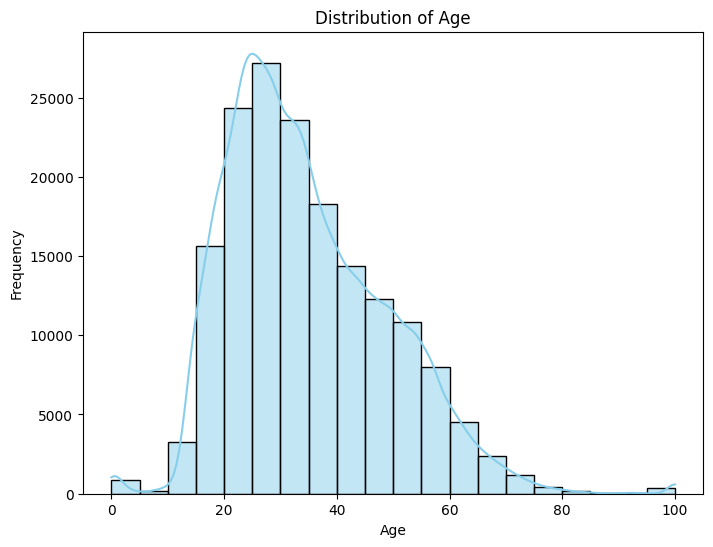

In [28]:
# Filter out missing values before plotting and add range age 0-100
existing_age_values = userdf['Age'].dropna().clip(0, 100)

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(existing_age_values, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

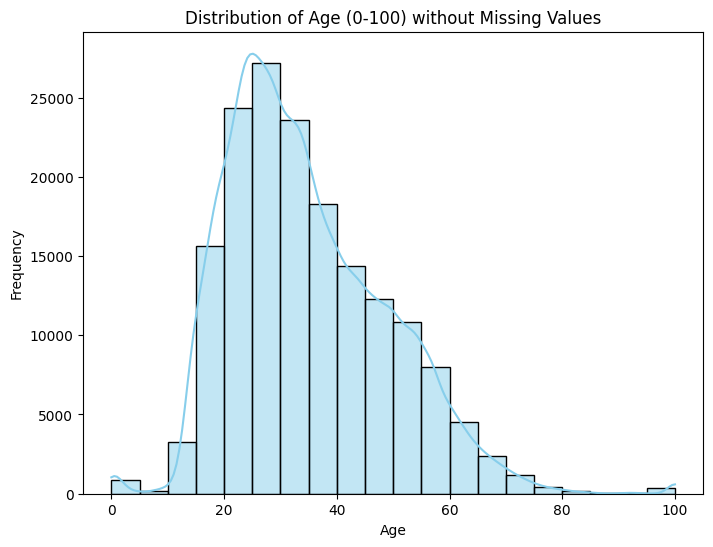

In [29]:
# Filter out missing values
existing_age_values = userdf['Age'].dropna()

# Apply range filter (0 to 100) and create a histogram
existing_age_values_filtered = existing_age_values.clip(0, 100)

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(existing_age_values_filtered, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age (0-100) without Missing Values')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The best option that we have is whether leave it blank or fill it with numerical, since the mean is produce so much bias, we'll fill it with standart deviation

In [30]:
import numpy as np

# Calculate mean and standard deviation of existing age values
mean_age = userdf['Age'].mean()
std_age = userdf['Age'].std()

# Generate random ages from a normal distribution centered around the mean, with standard deviation equal to the standard deviation of age values
random_ages = np.random.normal(loc=mean_age, scale=std_age, size=userdf['Age'].isna().sum())

# Fill missing age values with random ages
userdf.loc[userdf['Age'].isna(), 'Age'] = random_ages

In [31]:
userdf.tail(20)

,User-ID,Location,Age
278838,278839,"austin, texas, usa",12.521752
278839,278840,"encinitas, california, usa",45.000000
278840,278841,"llangollen, denbighshire county, united kingdom.",31.198601
278841,278842,"perth, western australia, australia",44.224365
278842,278843,"pismo beach, california, usa",28.000000
278843,278844,"st. paul, minnesota, usa",28.000000
278844,278845,"järvenpää, uusimaa, finland",22.995912
278845,278846,"toronto, ontario, canada",23.000000
278846,278847,"brooklyn, new york, usa",22.537249
278847,278848,"köln, nordrhein-westfalen, germany",31.142389


Now, we'll change dtypes for easier read

In [32]:
# Convert 'Age' column from float to integer
userdf['Age'] = userdf['Age'].astype(int)

# **D. FORMATTING**

Now, we'll try to format them for train step, by checking is the user_id in both dataset are the same

In [33]:
# Check common User-IDs
common_user_ids = set(ratingdf['User-ID']).intersection(userdf['User-ID'])

# Check if all User-IDs in ratingdf are in userdf
ratings_user_ids = set(ratingdf['User-ID'])
if ratings_user_ids.issubset(common_user_ids):
    print("All User-IDs in ratings.csv exist in users.csv\n")
else:
    print("Some User-IDs in ratings.csv do not exist in users.csv\n")

# Check if all User-IDs in userdf are in ratingdf
users_user_ids = set(userdf['User-ID'])
if users_user_ids.issubset(common_user_ids):
    print("All User-IDs in users.csv exist in ratings.csv")
else:
    print("Some User-IDs in users.csv do not exist in ratings.csv")

All User-IDs in ratings.csv exist in users.csv

Some User-IDs in users.csv do not exist in ratings.csv


Merging age to the user_id

In [34]:
mergeduserdf = pd.merge(ratingdf, userdf[['User-ID', 'Age']], on='User-ID', how='left')

In [35]:
mergeduserdf.tail(20)

,User-ID,ISBN,Book-Rating,Age
1149760,276704,0312873115,0,18
1149761,276704,0345386108,6,18
1149762,276704,0380796155,5,18
1149763,276704,0395404258,0,18
1149764,276704,0425060772,0,18
1149765,276704,0440206529,0,18
1149766,276704,0441007813,0,18
1149767,276704,0446353957,0,18
1149768,276704,0446605409,0,18
1149769,276704,059032120X,0,18


In [37]:
bookdf.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# **C. Adjusting**

Since we don't need the image url we will drop them. Also we'll rename some coloumns for easier access.

In [44]:
#Drop
bookdf = bookdf.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

In [46]:
#Rename
bookdf = bookdf.rename(columns={'Book-Title': 'Tittle',
                       'Book-Author': 'Author'})

mergeduserdf = mergeduserdf.rename(columns={'User-ID': 'User_id',
                             'Book-Rating': 'Rating'})

In [49]:
bookdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Tittle               271360 non-null  object
 2   Author               271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [50]:
mergeduserdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User_id  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   Rating   1149780 non-null  int64 
 3   Age      1149780 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 35.1+ MB


In [66]:
print(bookdf['Year-Of-Publication'].unique())

[2002. 2001. 1991. 1999. 2000. 1993. 1996. 1988. 2004. 1998. 1994. 2003.
 1997. 1983. 1979. 1995. 1982. 1985. 1992. 1986. 1978. 1980. 1952. 1987.
 1990. 1981. 1989. 1984.    0. 1968. 1961. 1958. 1974. 1976. 1971. 1977.
 1975. 1965. 1941. 1970. 1962. 1973. 1972. 1960. 1966. 1920. 1956. 1959.
 1953. 1951. 1942. 1963. 1964. 1969. 1954. 1950. 1967. 2005. 1957. 1940.
 1937. 1955. 1946. 1936. 1930. 2011. 1925. 1948. 1943. 1947. 1945. 1923.
 2020. 1939. 1926. 1938. 2030. 1911. 1904. 1949. 1932. 1928. 1929. 1927.
 1931. 1914. 2050. 1934. 1910. 1933. 1902. 1924. 1921. 1900. 2038. 2026.
 1944. 1917. 1901. 2010. 1908. 1906. 1935. 1806. 2021. 2012. 2006. 1909.
 2008. 1378. 1919. 1922. 1897. 2024. 1376. 2037.]


In [65]:
# Convert 'Year-Of-Publication' to numeric, coercing errors to NaN
bookdf['Year-Of-Publication'] = pd.to_numeric(bookdf['Year-Of-Publication'], errors='coerce')

# Identify rows with NaN values in 'Year-Of-Publication'
invalid_years = bookdf[bookdf['Year-Of-Publication'].isna()]

# Print the rows with invalid 'Year-Of-Publication' values
print(invalid_years)

Empty DataFrame
Columns: [ISBN, Tittle, Author, Year-Of-Publication, Publisher]
Index: []


In [68]:
print(bookdf['Author'].unique())

['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']


In [69]:
print(bookdf['Tittle'].unique())

['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]


In [70]:
print(bookdf['Publisher'].unique())

['Oxford University Press' 'HarperFlamingo Canada' 'HarperPerennial' ...
 'Tempo' 'Life Works Books' 'Connaught']


In [71]:
print(bookdf['ISBN'].unique())

['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752']


In [77]:
# Convert 'Year-Of-Publication' to integers, handling non-numeric values
bookdf['Year-Of-Publication'] = pd.to_numeric(bookdf['Year-Of-Publication'], errors='coerce').astype(int)


In [79]:
bookdf.head(10)

,ISBN,Tittle,Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


In [80]:
userdf.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",39
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",49
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",38
5,6,"santa monica, california, usa",61
6,7,"washington, dc, usa",11
7,8,"timmins, ontario, canada",41
8,9,"germantown, tennessee, usa",30
9,10,"albacete, wisconsin, spain",26


# **We're alright, now we're merging them and move to our next part**

In [81]:

# Merge the datasets based on the common key ISBN
merged_df = pd.merge(mergeduserdf, bookdf, on='ISBN', how='inner')

In [82]:
merged_df.head(10)

,User_id,ISBN,Rating,Age,Tittle,Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,76,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,23,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,2,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,58,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
5,23768,034545104X,0,45,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
6,28266,034545104X,0,33,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
7,28523,034545104X,0,24,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
8,39002,034545104X,0,40,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
9,50403,034545104X,9,25,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [83]:
merged_df.to_csv('cleandf.csv', index=False)